In [3]:
import networkx as nx
from networkx import read_graphml
import matplotlib.pyplot as plt
import numpy as np
from typing import List

## Plotting functions

In [17]:
def plot_hist(data: List[float], title: str,label: str, xlabel: str = "", density=True, show=True):
    plt.hist(data, label=label, density=density)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(f"{'density' if density else 'count'} ")
    if show:
        plt.legend()
        plt.show()
    

# General Data

In [4]:
graph = read_graphml("data/newyork.graphml")

In [4]:
print(f"n nodes: {len(graph.nodes())}")
print(f"n edges: {len(graph.edges())}")
print(f"graph is directed: {nx.is_directed(graph)}")
print(f"graph weakly connected: {nx.is_weakly_connected(graph)}") # Treat edges as undirected
print(f"graph strongly connected: {nx.is_strongly_connected(graph)}") # Treat edges as directed

n nodes: 54128
n edges: 142123
graph is directed: True
graph weakly connected: True
graph strongly connected: False


### Component analysis

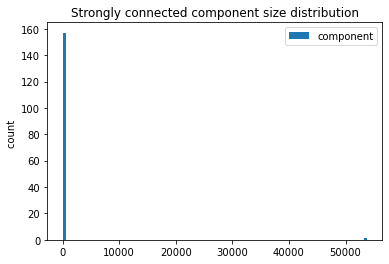

In [11]:
component_size = np.array([len(value) for index, value in enumerate(sorted(nx.strongly_connected_components(graph), key=len, reverse=True))])
plot_hist(component_size, "Strongly connected component size distribution", "component", density=False)

We have a lot of small unconnected components (strong connectivity)

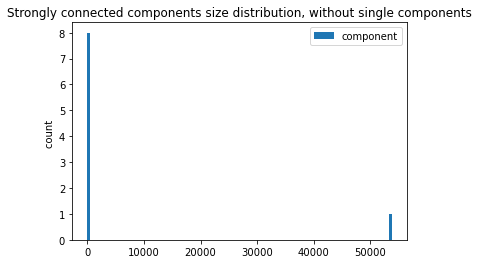

In [12]:
plot_hist(component_size[component_size>1], "Strongly connected components size distribution, without single components", "component", density=False)

By removing all components with size < 2 we end up with 9 components.  
Suggestion: Remove all components except the big one, since the small ones hardly matter

In [10]:
largest_component = list(sorted(nx.strongly_connected_components(graph), key=len, reverse=True))[0]
graph = graph.subgraph(largest_component)

In [11]:

print(f"n nodes: {len(graph.nodes())}")
print(f"n edges: {len(graph.edges())}")
print(f"graph is directed: {nx.is_directed(graph)}")
print(f"graph weakly connected: {nx.is_weakly_connected(graph)}") # Treat edges as undirected
print(f"graph strongly connected: {nx.is_strongly_connected(graph)}") # Treat edges as directed

n nodes: 53769
n edges: 141322
graph is directed: True
graph weakly connected: True
graph strongly connected: True


### degree distribution

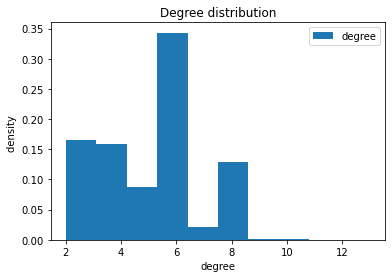

In [18]:
degrees = [i[1] for i in graph.degree()]
plot_hist(degrees, "Degree distribution", "degree", "degree")